<a href="https://colab.research.google.com/github/carlosperez1997/JOBarcelona22_DataScience/blob/main/JOBarcelona22_DataScience_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBarcelona ’22 | Data Science
# **EDA**
Desarrollado por: Carlos Pérez Ricardo

Puesto: Data Scientist en Grupo Hotusa

En este notebook se realizará un Análisis Exploratorio de los datos que consiste en realizar investigaciones iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones con la ayuda de estadísticas resumidas y representaciones gráficas.

## **Data Understanding**

Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.

Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

El dataset contiene datos de las mediciones de los sensores, el tiempo de las mediciones y el tipo de insecto identificado.

El dataset 'train.csv' contiene las siguientes variables:

* *Hour*: Hora a la que se ha hecho la medición.

* *Minutes*: Minutos en los que se ha realizado la medición.

* *Sensor_alpha*: Posición del insecto al sensor alpha.

* *Sensor_beta*: Posición del insecto al sensor beta.

* *Sensor_gamma*: Posición del insecto al sensor gamma.

* *Sensor_alpha_plus*: Posición del insecto al sensor alpha+.

* *Sensor_beta_plus*: Posición del insecto al sensor beta+.

* *Sensor_gamma_plus*: Posición del insecto al sensor gamma+.

* *Insect*: Categoría de insecto.
  - 0 -> Lepidoptero
  - 1 -> Himenoptera
  - 2 -> Diptera

**Importación de los paquetes y datos**

In [ ]:
# Basics
import pandas as pd
import numpy as np
import os

# Math tools
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [ ]:
perc =[0.05, .10, .25, 0.5, 0.75, .90, 0.95]

DIR = '/content'
TARGET = 'Insect'

In [ ]:
train_df = pd.read_csv(os.path.join('train.csv'), index_col = 0)

In [ ]:
train_df.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


In [ ]:
train_df.shape

(7001, 9)

## **Análisis Univariante**

Para cada variable se realiza un análisis univariante. Como su propio nombre indica el propósito es realizar un análisis de una sola variable, por lo tanto no se trata de buscar causas o relaciones con otras variables. El propósito de este análisis es resumir los datos y encontrar patrones.

Las variables se pueden agrupar en diferentes grupos:

* **Variables temporales**: Hour, Minutes (Hour se tratará como categórica)
* **Variables numéricas**: Sensor_alpha,	Sensor_beta,	Sensor_gamma,	Sensor_alpha_plus,	Sensor_beta_plus,	Sensor_gamma_plus
* **Variable objetivo**: Insect (se tratará como categórica)

In [ ]:
train_df['Hour'] =  train_df['Hour'].astype('category')
train_df['Insect'] =  train_df['Insect'].astype('category')

### **Variables temporales**

Existen las siguientes variables temporales: Hour, Minutes (Hour se tratará como categórica).

In [ ]:
vars = ['Minutes']
train_df[vars].describe()

,Minutes
count,7001.000000
mean,29.405942
std,17.375830
min,0.000000
25%,14.000000
50%,29.000000
75%,44.000000
max,59.000000


In [ ]:
vars = ['Hour']
train_df[vars].describe()

,Hour
count,7001
unique,23
top,21
freq,3235


In [ ]:
def countplot(df, var):
    rcParams['figure.figsize'] = 18,4
    sns.set(style='white', rc={"grid.linewidth": 0.1})
    
    fig, ax = plt.subplots()
    sns.countplot(data=train_df, x=var, ax=ax)
    ax.axes.set_title("Countplot of "+var,fontsize=20)
    ax.set_xlabel(var,fontsize=16)
    plt.show()

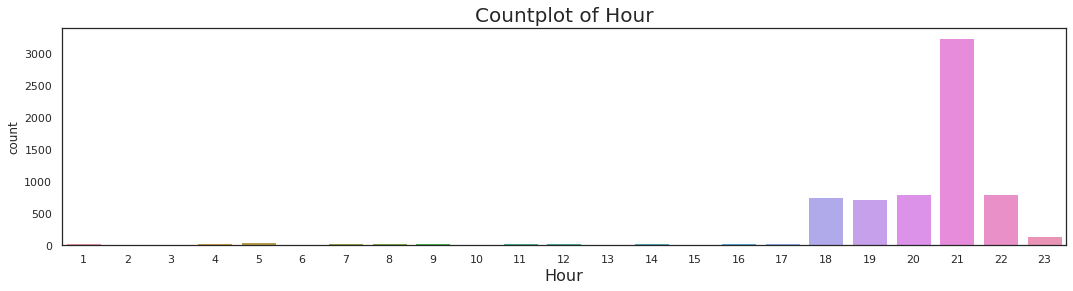

In [ ]:
countplot(train_df, "Hour")

Como se comentaba en la introducción del ejercicio, se trata de insectos nocturnos por lo que la gran mayoría de horas en las que se grabaron los registros son por la noche o tarde-noche. Siendo las 9 de la noche (21) la hora con más registros. 

### **Variables numéricas**

Las variables numéricas, todas ellas, corresponden a valores de los sensores: Sensor_alpha, Sensor_beta, Sensor_gamma, Sensor_alpha_plus, Sensor_beta_plus, Sensor_gamma_plus. 

In [ ]:
vars = ['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus']
train_df[vars].describe(percentiles = perc)

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533
std,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951
min,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689
5%,-159.531623,-240.286894,-197.609588,-181.494596,-168.671020,-167.290932
10%,-126.519671,-190.588979,-156.565389,-141.081021,-127.182506,-130.345474
25%,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647
50%,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128
75%,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524
90%,129.592431,144.566268,138.857533,171.079708,128.100027,129.282108


In [ ]:
def hist_kde_plot(df, var):
    # https://stackoverflow.com/questions/33323432/add-kde-on-to-a-histogram
    fig, ax1 = plt.subplots()
    sns.kdeplot(data=df, x=var, ax=ax1)
    ax1.set_xlim((df[var].min(), df[var].max()))
    ax1.axes.set_title("Histogram and KDE plot of "+var,fontsize=20)
    ax1.set_xlabel(var,fontsize=16)
    ax2 = ax1.twinx()
    sns.histplot(data=df, x=var, discrete=True, ax=ax2)
    plt.show()

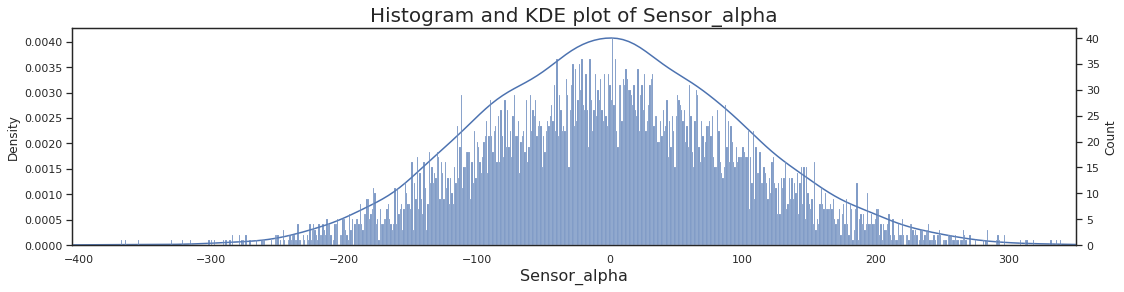

In [ ]:
hist_kde_plot(train_df, 'Sensor_alpha')

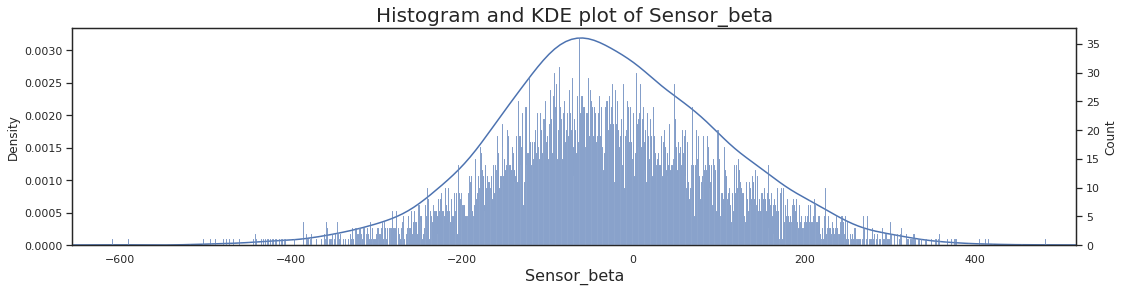

In [ ]:
hist_kde_plot(train_df, 'Sensor_beta')

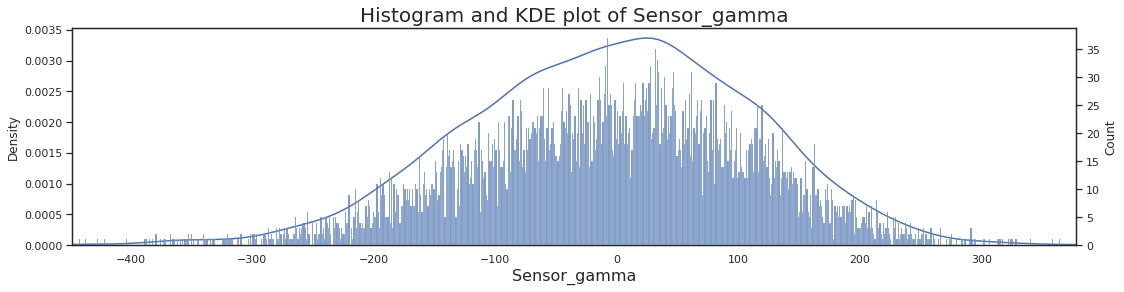

In [ ]:
hist_kde_plot(train_df, 'Sensor_gamma')

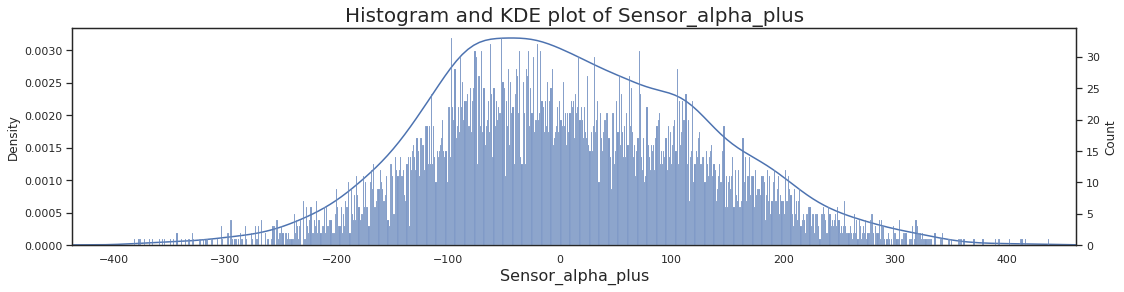

In [ ]:
hist_kde_plot(train_df, 'Sensor_alpha_plus')

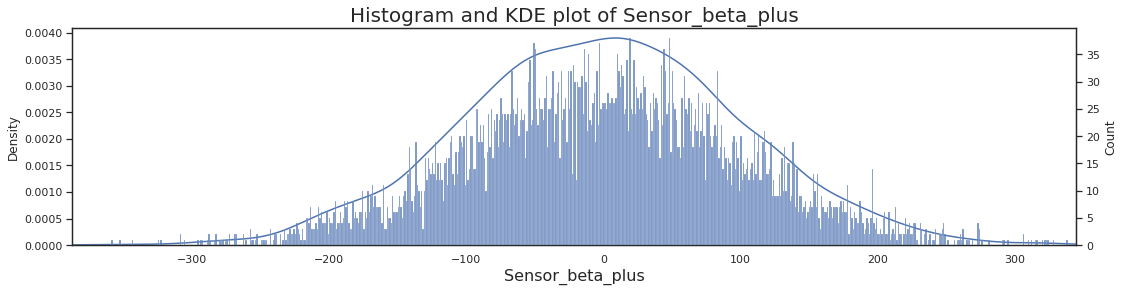

In [ ]:
hist_kde_plot(train_df, 'Sensor_beta_plus')

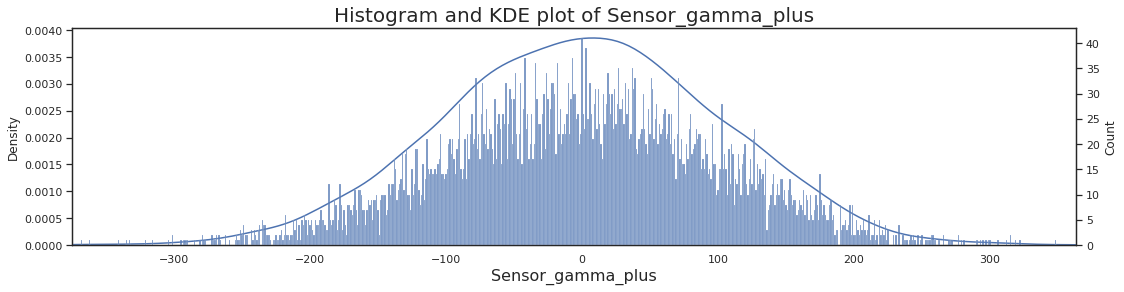

In [ ]:
hist_kde_plot(train_df, 'Sensor_gamma_plus')

Los datos extraídos de los sensores están normalmente distribuidos (tienen forma de campana de gauss), aunque se trata de una campana más ancha que alta. Es decir, con una desviación estándar y un rango intercuartil grande. 

La mayoría de sensores están centrados en 0 (o mejor dicho tienen su media y mediana alrededor del 0) y tienen rango de valores similares. El rango suele ir entre los -400 y los 300. 

Que estas variables tengan una distribución normal y que el rango de valores sea común es un aspecto positivo y que hace que este datos sea más fácil de trabajar con ellos. No hará falta ninguna transformación y el dato podrá introducirse así al modelo (en especial a cualquier modelo geométrico: KNN, SVM, Logistic Regression...) 

### **Variable objetivo**
Nuestra variable objetivo o target es Insect. El futuro modelo a construir deberá ser capaz dado un input de predecir el output y que éste se parezca lo más posible a la variable objetivo.

Tenemos 3 categorías posibles:
- 0 -> Lepidoptero
- 1 -> Himenoptera
- 2 -> Diptera

Como se observa hay más registros de Lepidoptero que de Himenoptera. El insecto con menos registros es Diptera.

Existen 7000 registros de los cuales: 3519 corresponden a Lepidoptero, 2793 a Himenoptera y 689 a Diptera. 

Normalmente, en datasets con categorías desbalanceadas, el modelo suele tender a predecir las categorías más comunes (simplemente porque tiene menos posiblidad de errar). Por lo que será un reto conseguir que el modelo sea capaz de detectar correctamente los Diptera.

In [ ]:
train_df["Insect"].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

In [ ]:
train_df["Insect"].value_counts(normalize=True)*100

0    50.264248
1    39.894301
2     9.841451
Name: Insect, dtype: float64

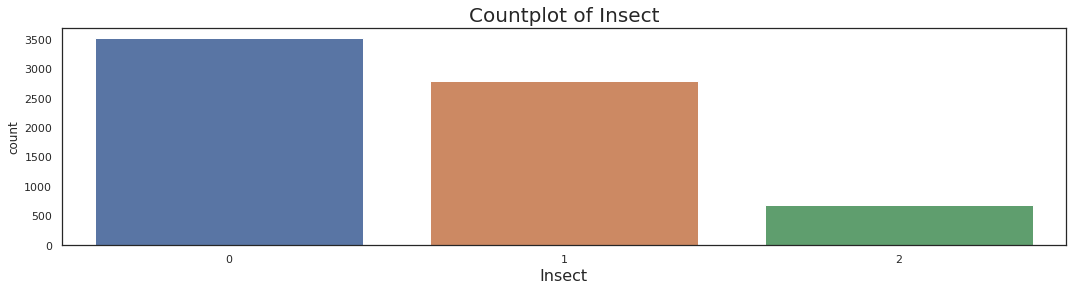

In [ ]:
countplot(train_df, "Insect")

## **Análisis Multivariante**

En esta sección, se realiza un análisis multivariante para mejorar la comprensión del conjunto de datos. Se realizarán varias comparaciones entre diferentes variables. 

Se realizará un análisis entre las variables como también entre las variables y el target. Será interesante ver cómo se relaciona cada una de las variables con las categorías de insectos. 

El próposito de este análisis es resolver preguntas:
- ¿Tiende algún insecto a tener valores más altos en un sensor?
- ¿Si se suman 2 variables obtenemos variables más relevantes?

In [ ]:
vars = ['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus']
train_df.groupby('Insect')[vars].describe().transpose()

Insect                             0            1           2
Sensor_alpha      count  3519.000000  2793.000000  689.000000
                  mean     -0.539901     1.652173    0.908656
                  std      99.212238    98.590230  102.599969
                  min    -404.898823  -364.620641 -321.604631
                  25%     -67.635054   -69.299041  -68.093223
                  50%      -0.764721     0.735371   -0.669680
                  75%      66.565226    65.394980   71.083074
                  max     339.206060   351.256221  313.271037
Sensor_beta       count  3519.000000  2793.000000  689.000000
                  mean    -72.940054    -2.645365   78.687605
                  std     125.747431   126.235609  102.034540
                  min    -656.272666  -400.239371 -301.795879
                  25%    -147.637185   -92.476093    7.925152
                  50%     -72.175469   -14.612991   82.151106
                  75%       4.198886    79.346053  139.980358
                  max     392.565394   421.221901  518.395878
Sensor_gamma      count  3519.000000  2793.000000  689.000000
                  mean     -0.479442     4.744293  -73.936296
                  std     110.988598   118.925205  104.758862
                  min    -379.210183  -442.677638 -448.478039
                  25%     -80.022286   -66.975946 -142.568545
                  50%      -4.083438    23.249827  -70.853085
                  75%      77.182083    89.718804   -7.980612
                  max     358.570603   378.349287  236.798359
Sensor_alpha_plus count  3519.000000  2793.000000  689.000000
                  mean     69.670511   -69.640131   -0.496420
                  std     107.226564    83.260579  146.075702
                  min    -285.345930  -376.283575 -437.205393
                  25%      -2.701575  -121.589990  -91.552684
                  50%      70.778358   -70.461169   -0.789021
                  75%     140.077496   -19.133814  100.789302
                  max     462.556319   321.809075  437.608450
Sensor_beta_plus  count  3519.000000  2793.000000  689.000000
                  mean     -1.482169     1.033609   -4.321012
                  std     100.529146    99.860240   98.243411
                  min    -358.457767  -387.567443 -293.234932
                  25%     -67.409201   -67.315760  -72.694838
                  50%      -1.583096     0.465228   -3.203397
                  75%      66.037242    67.336522   64.642687
                  max     328.253906   345.279240  245.457436
Sensor_gamma_plus count  3519.000000  2793.000000  689.000000
                  mean     -1.166944     1.227071   -4.648801
                  std     101.132973   100.553358   97.341717
                  min    -374.961689  -332.717810 -316.284183
                  25%     -69.985733   -67.726978  -77.184686
                  50%       0.133117     0.552660   -2.544153
                  75%      66.192303    70.879031   61.418983
                  max     363.682391   347.793230  294.940101

In [ ]:
def distcountplot(df, var, group):
  
    rcParams['figure.figsize'] = 17,5
    sns.set(style='white', rc={"grid.linewidth": 0.1})

    fig, ax = plt.subplots()

    sns.boxenplot(y=var, x=group, data=df, ax=ax)
    ax.axes.set_title("Distribution plots for "+var,fontsize=20)
    ax.set_xlabel(group,fontsize=12)
    ax.set_ylabel(var,fontsize=12)

    plt.show()

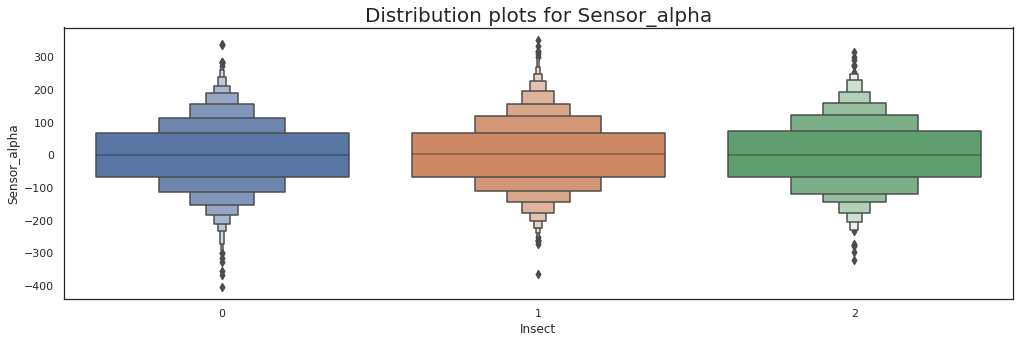

In [ ]:
distcountplot(train_df, 'Sensor_alpha', 'Insect')

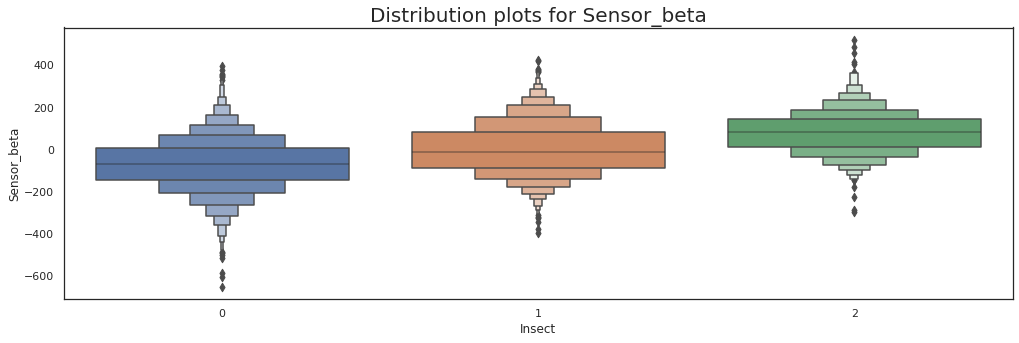

In [ ]:
distcountplot(train_df, 'Sensor_beta', 'Insect')

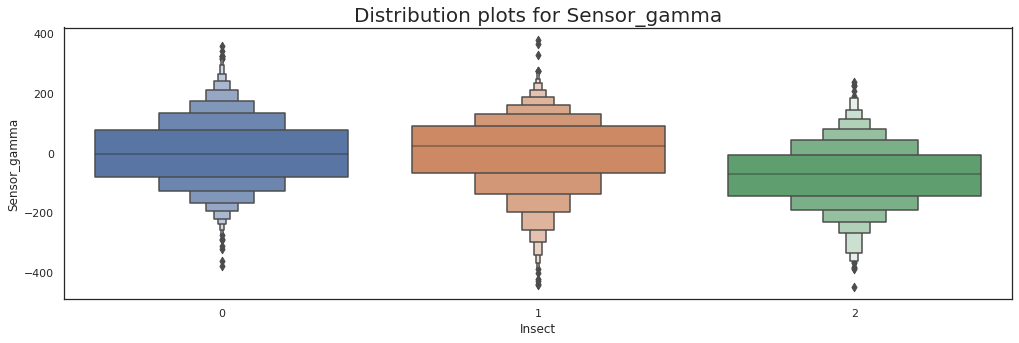

In [ ]:
distcountplot(train_df, 'Sensor_gamma', 'Insect')

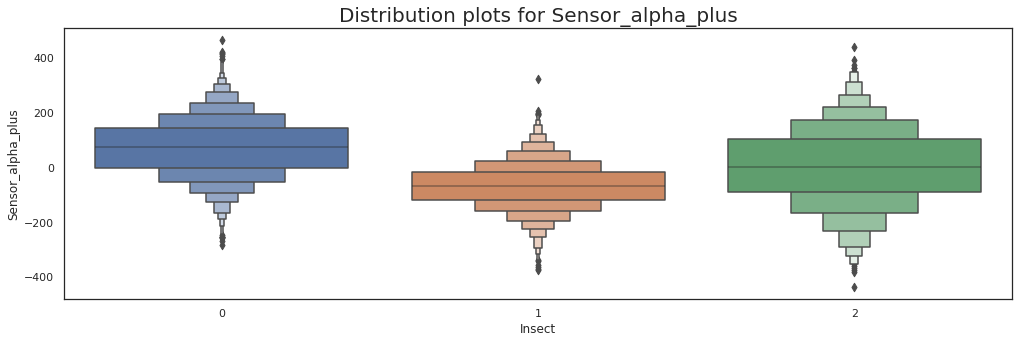

In [ ]:
distcountplot(train_df, 'Sensor_alpha_plus', 'Insect')

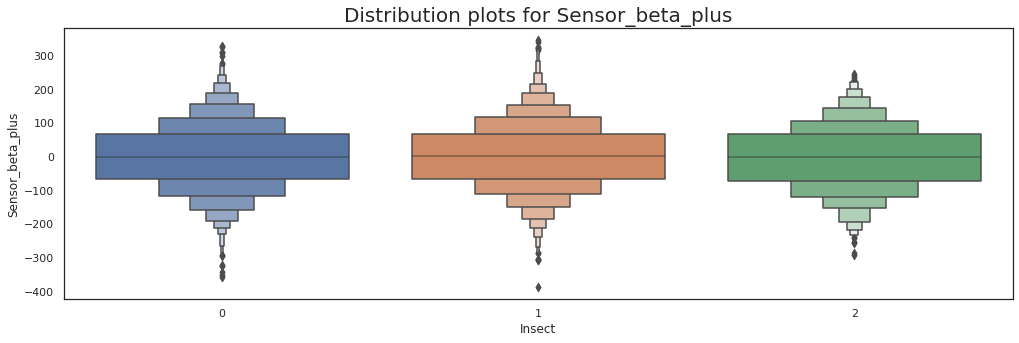

In [ ]:
distcountplot(train_df, 'Sensor_beta_plus', 'Insect')

Como se observa en las distribuciones de los sensores, los insectos no indican diferencias destacables. Sensor_beta, Sensor_alpha_plus y Sensor_gamma indica que algún tipo de insecto tiene un rango de valores distinto a los otros 2 insectos. 

In [ ]:
keep = list(train_df.columns)
keep

['Hour',
 'Minutes',
 'Sensor_alpha',
 'Sensor_beta',
 'Sensor_gamma',
 'Sensor_alpha_plus',
 'Sensor_beta_plus',
 'Sensor_gamma_plus',
 'Insect']

### **Combinación lineal de las medidas sensores**

Dado que las variables de los sensores parecen estar normalmente distribuidas y con un rango de valores similares, son ideales para hacer combinaciones lineales entre ellas y observar patrones.

Se realizarán 2 tipos de combinaciones:
- 2 elementos (a y b): Estos 2 elementos se sumarán, restarán y multiplicarán. 
- 3 elementos (a, b y c): Igual que para 2 elementos se sumarán, restarán y multiplicarán entre ellos. 

Con 6 valores de sensores, considerando la combinación de 2 elementos y realizando las 3 operaciones (suma, resta y multiplicación) se generan 45 (3*15) nuevos features. 

Si se consideran 3 elementos, esto conlleva a 189 (9*21) nuevos features.

Observar cada feature en detalle no es viable, por lo que se ha decidido únicamente representar aquellas variables en las que se observa más diferencia en el rango de valores entre las categorías de insectos. 

Para ello se computa una diferencia entre cuartiles: x['25%'].max() - x['25%'].min() + x['75%'].max() - x['75%'].min()

In [ ]:
# 2 comb
n_sum, n_diff, n_mult = 10, 10, 10

# 3 comb
n_sumsum, n_sumdiff, n_summult = 10, 10, 10
n_diffdiff, n_diffsum, n_diffmult = 10, 10, 10
n_multmult, n_multsum, n_multdiff = 10, 10, 10

vars = ['Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus', 'Sensor_gamma_plus']

In [ ]:
def op_2comp(df, vars, fun):
    vars_ = vars.copy()
     
    for var1 in vars:
        vars_.remove(var1)
        for var2 in vars_:
            if fun == 'sum':
                df[var1+'_'+var2+'_x'] = df[var1] + df[var2]
            elif fun == 'diff':
                df[var1+'_'+var2+'_x'] = df[var1] - df[var2]
            elif fun == 'mult':
                df[var1+'_'+var2+'_x'] = df[var1] * df[var2]

    cols = [x for x in df.columns if '_x' in x]
    cols_map = { col : str(col).replace('x',fun) if '_x' in col else col for col in cols }
    df = df.rename(columns=cols_map)
    cols = [x for x in df.columns if fun in x]

    diff_among_cats = {}
    for col in cols:
        x = df.groupby(TARGET)[col].describe().reset_index()
        diff_among_cats[col] = x['25%'].max() - x['25%'].min() + x['75%'].max() - x['75%'].min()
        #distcountplot(train_df, col, 'Insect')

    return(df, diff_among_cats)

In [ ]:
def op_3comp(df, vars, fun1, fun2):
    vars_1 = vars.copy()
    vars_2 = vars.copy()

    for var1 in vars: 
        for var2 in vars_1:
            for var3 in vars_2:
                #print(var1,var2,var3)

                if fun1 == 'sum' and fun2 == 'sum':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] + df[var2] + df[var3]
                elif fun1 == 'sum' and fun2 == 'diff':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] + df[var2] - df[var3]
                elif fun1 == 'diff' and fun2 == 'sum':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] - df[var2] + df[var3]
                elif fun1 == 'diff' and fun2 == 'diff':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] - df[var2] - df[var3]
                elif fun1 == 'sum' and fun2 == 'mult':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] + df[var2] * df[var3]
                elif fun1 == 'mult' and fun2 == 'sum':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] * df[var2] - df[var3]
                elif fun1 == 'diff' and fun2 == 'mult':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] - df[var2] * df[var3]
                elif fun1 == 'mult' and fun2 == 'diff':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] * df[var2] - df[var3]
                elif fun1 == 'mult' and fun2 == 'mult':
                    df[var1+'_'+var2+'_'+var3+'_x'] = df[var1] * df[var2] * df[var3]
            try:
                vars_2.remove(var2)
            except:
                pass
        vars_1.remove(var1)
        try:
            vars_2.remove(var1)
        except:
            pass

    cols = [x for x in df.columns if '_x' in x]
    cols_map = { col : str(col).replace('x',fun1+fun2) if '_x' in col else col for col in cols }
    df = df.rename(columns=cols_map)
    cols = [x for x in df.columns if fun1+fun2 in x]

    diff_among_cats = {}
    for col in cols:
        x = df.groupby(TARGET)[col].describe().reset_index()
        diff_among_cats[col] = x['25%'].max() - x['25%'].min() + x['75%'].max() - x['75%'].min()
        #distcountplot(train_df, col, 'Insect')

    return(df, diff_among_cats)

In [ ]:
def plot_and_keep(df, diff_among_cats, keep, n):
    cats_order = pd.DataFrame.from_dict({'col':diff_among_cats.keys(), 'value':diff_among_cats.values()})
    cats_order = cats_order.sort_values('value', ascending=False)

    for col in cats_order['col'].head(5):
        distcountplot(df, col, TARGET)
        
    for col in cats_order['col'].head(n):
        keep.append(col)

    return(keep)

#### Combinaciones de 2 variables

Existen 3 operaciones posibles para una combinación de 2 variables:
- a + b
- a - b
- a * b

En las combinaciones de 2 variables por nombrar algunas destacan:
- El gran rango que tiene existe en el Insecto 2 en la nueva variable: Sensor_beta_Sensor_alpha_plus_sum.
- O la diferencia de valores que existe en el Insecto 1 en la nueva variable: Sensor_beta_Sensor_beta_plus_diff.

Se puede observar que la generación de estas nuevas variables aporta mayores diferencias en las distribuciones entre los insectos.


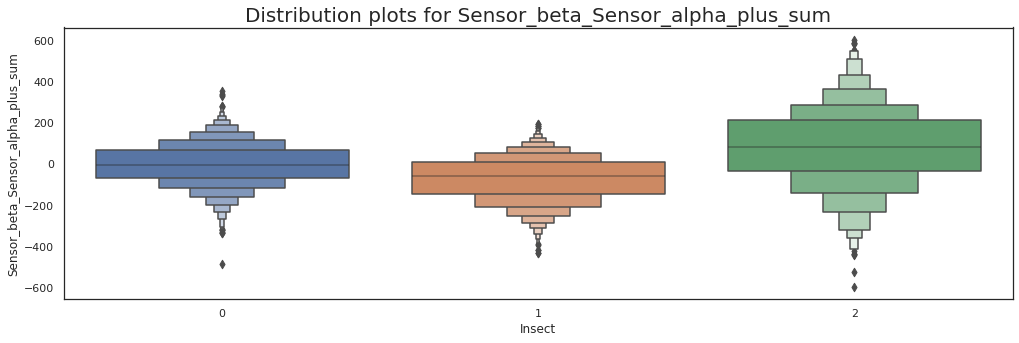

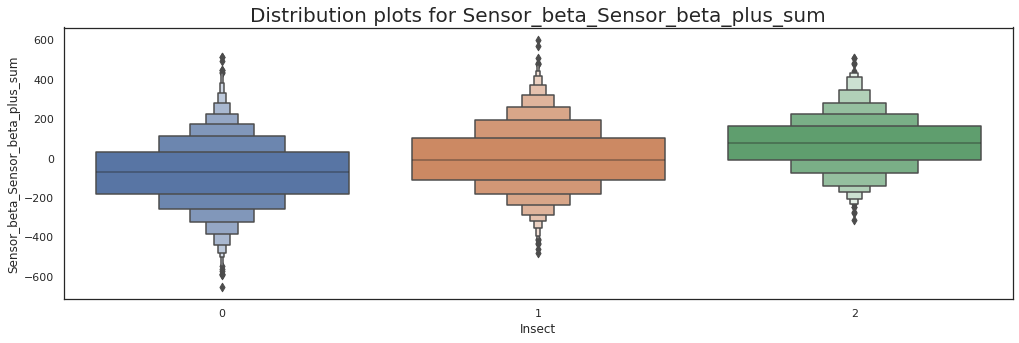

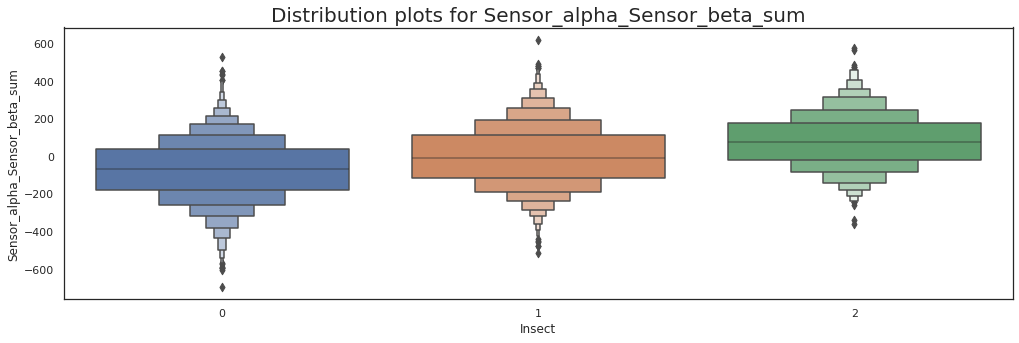

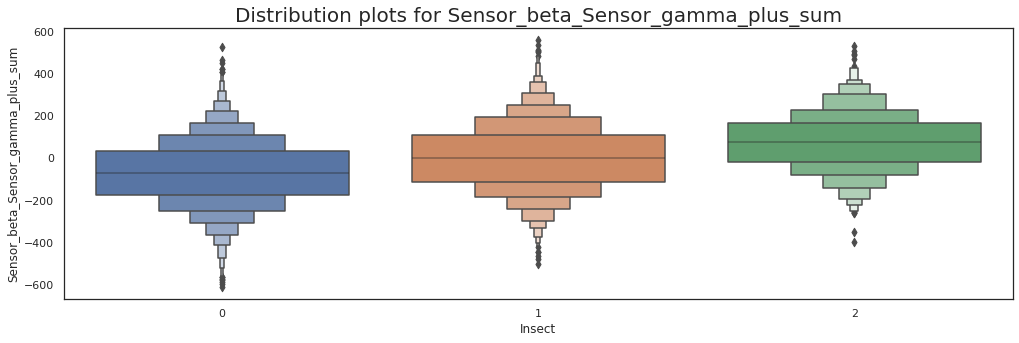

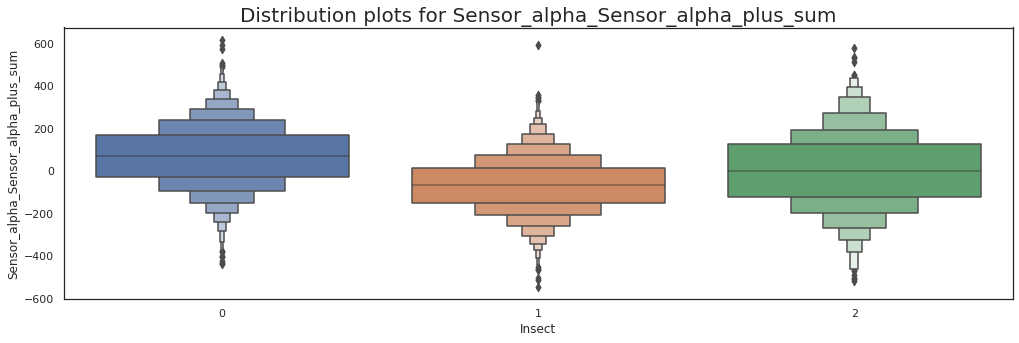

In [ ]:
train_df, diff_among_cats = op_2comp(train_df, vars, 'sum')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_sum)

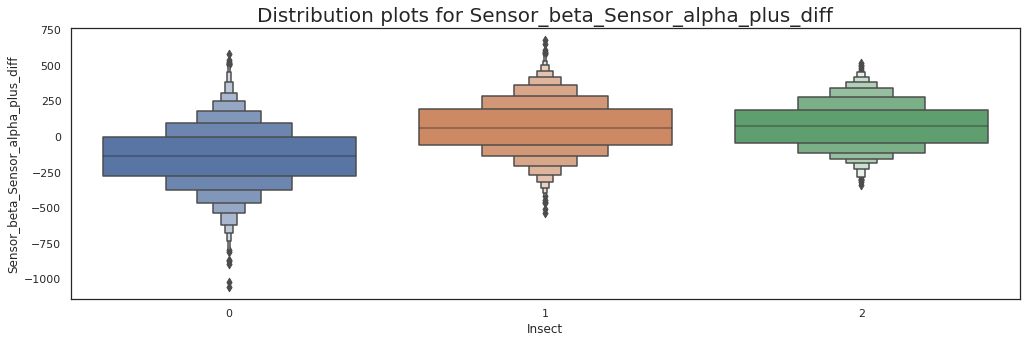

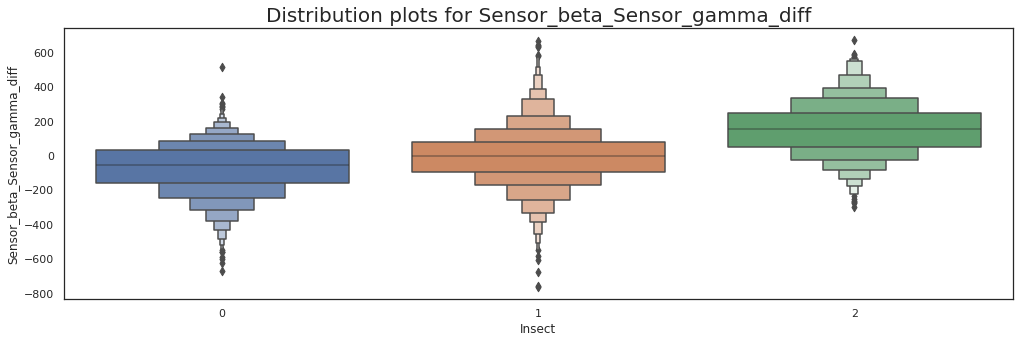

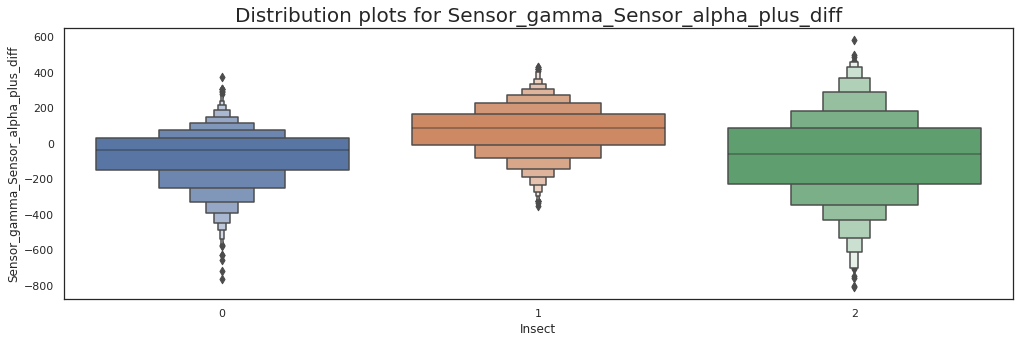

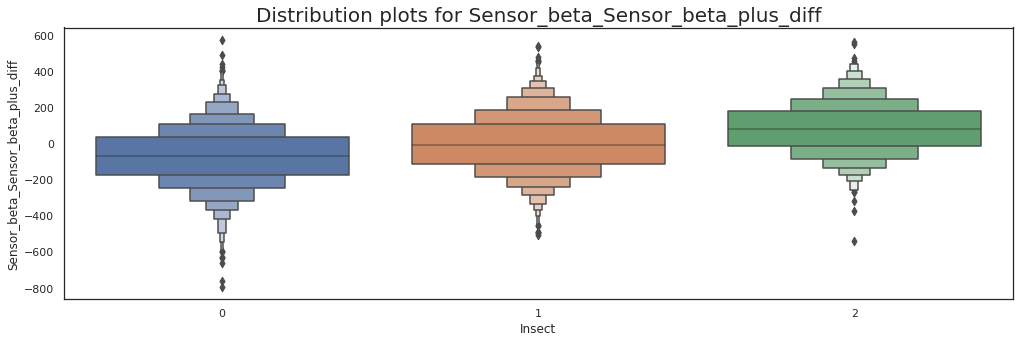

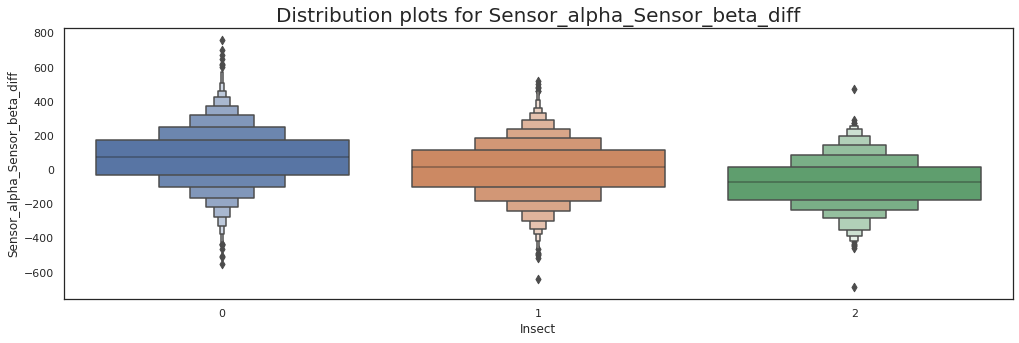

In [ ]:
train_df, diff_among_cats = op_2comp(train_df, vars, 'diff')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_diff)

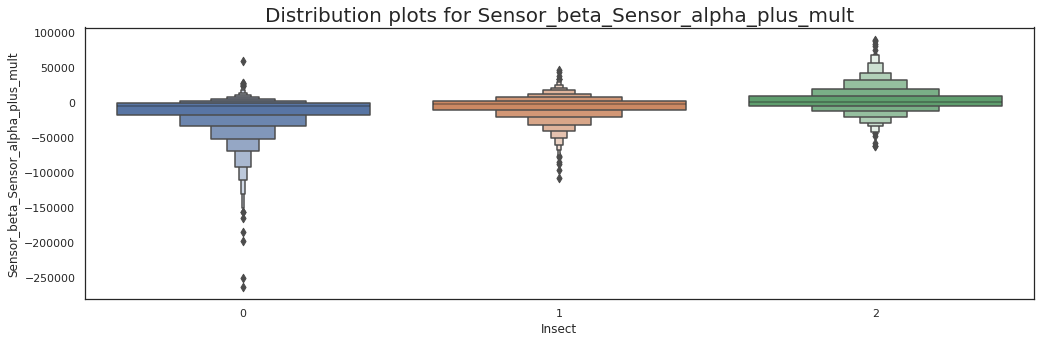

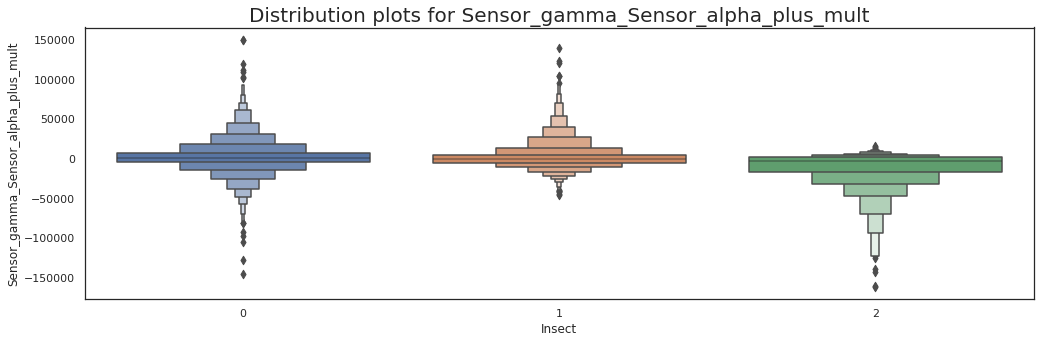

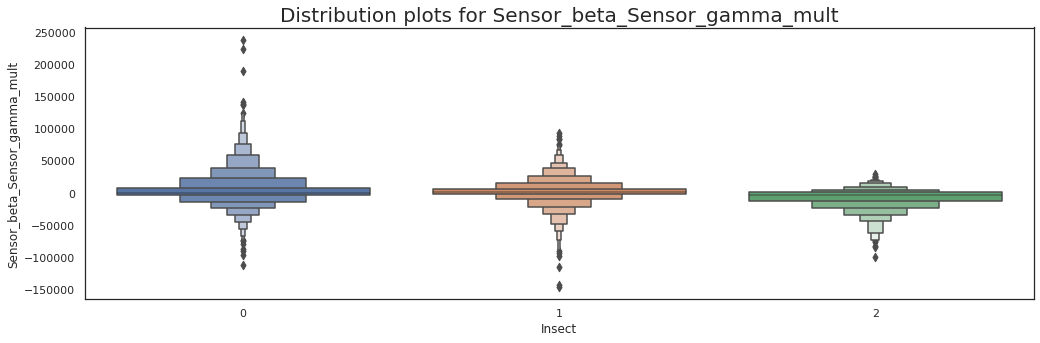

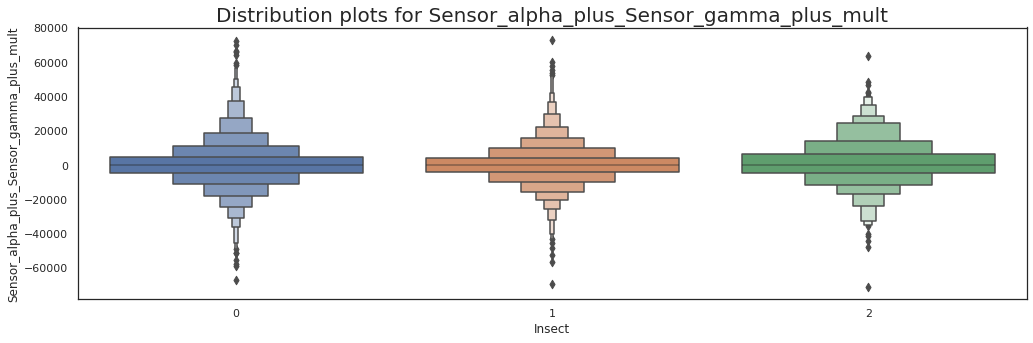

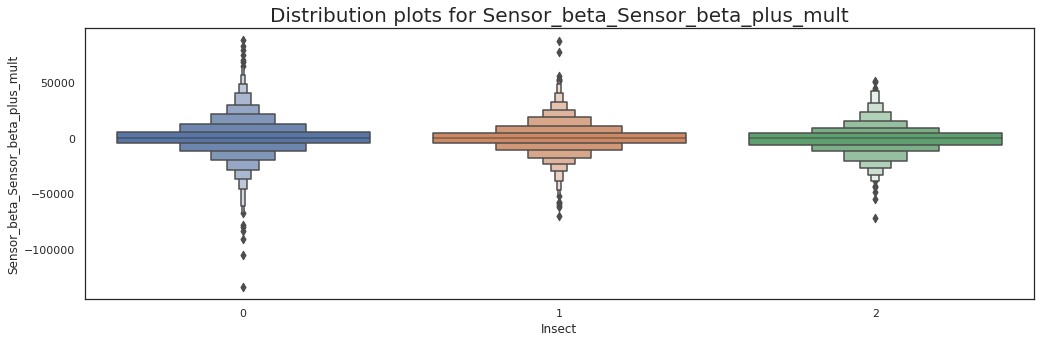

In [ ]:
train_df, diff_among_cats = op_2comp(train_df, vars, 'mult')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_mult)

#### Combinaciones de 3 variables

En las combinaciones de 3 variables existen 9 operaciones posibles. Para los elementos a, b y c:
- a + b + c
- a + b - c
- a + b * c
- a - b + c
- a - b * c
- a - b - c
- a * b + c
- a * b - c
- a * b * c

No se comentará nada sobre la distribución de las variables dada la gran cantidad de features generados. 

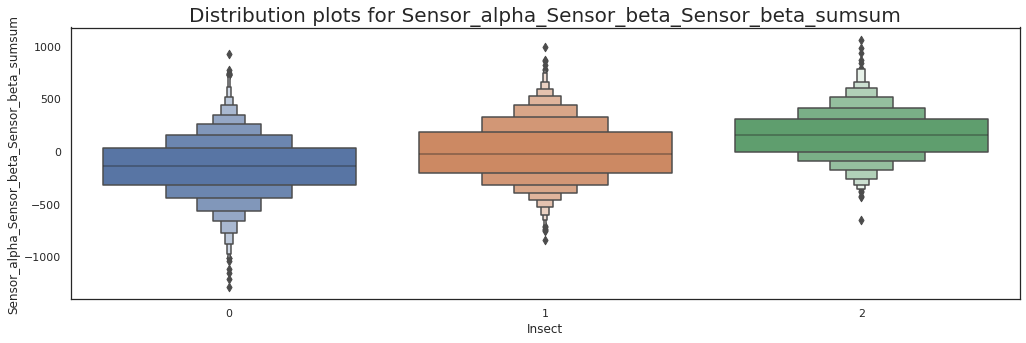

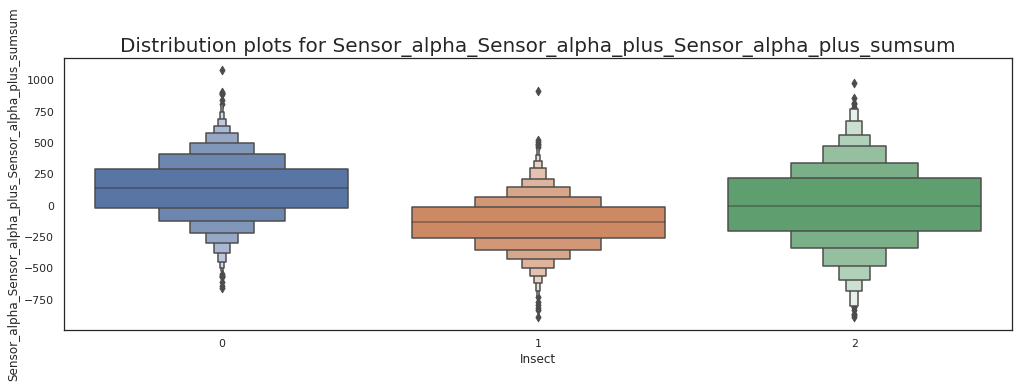

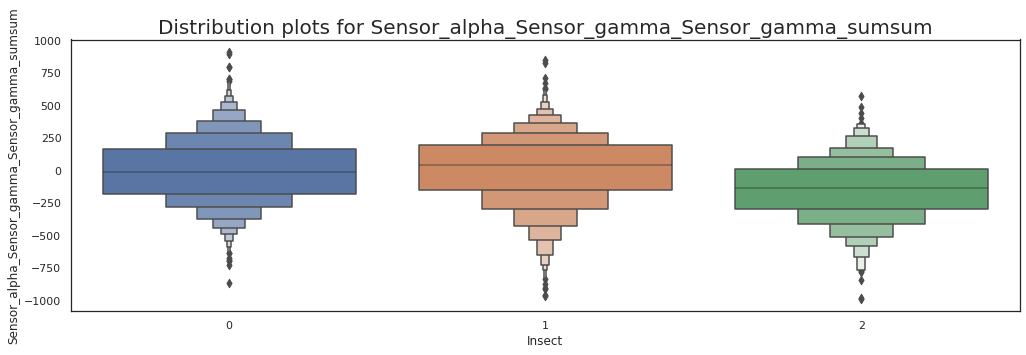

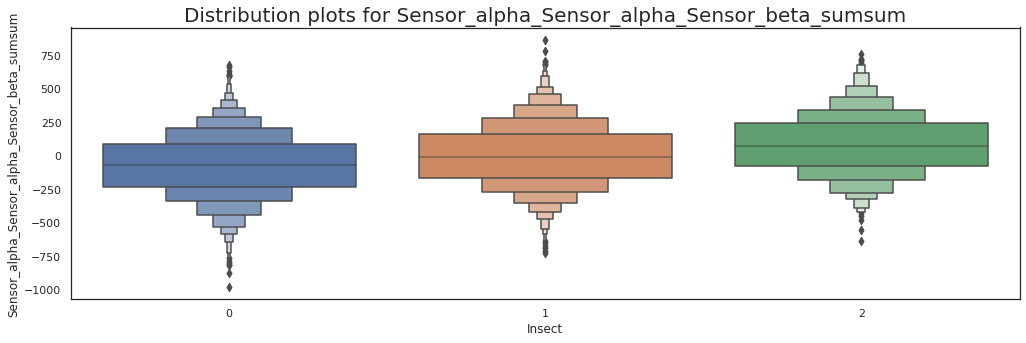

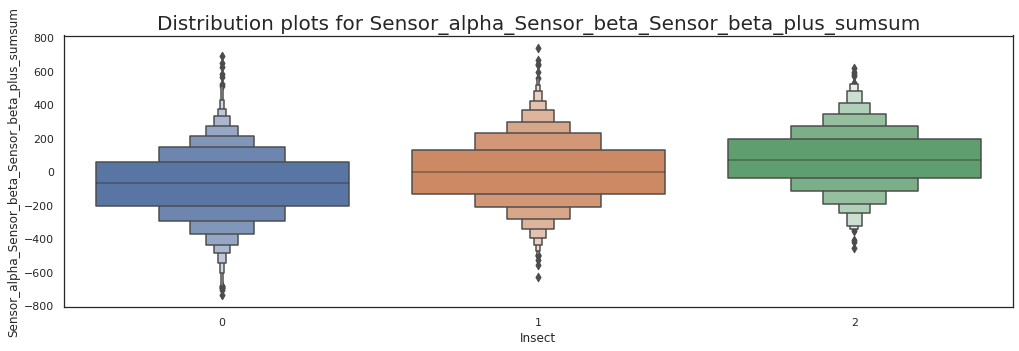

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'sum', 'sum')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_sumsum)

In [ ]:
len(diff_among_cats)

21

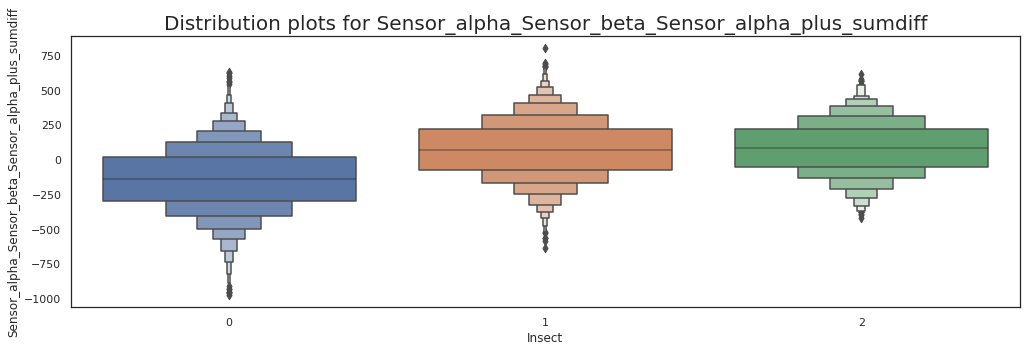

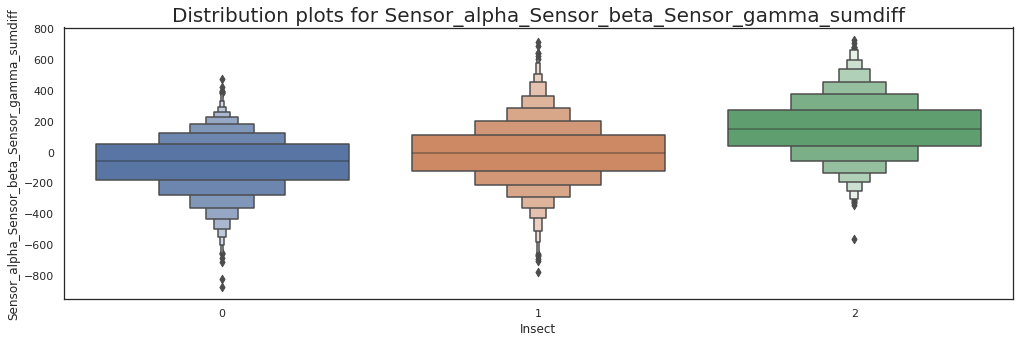

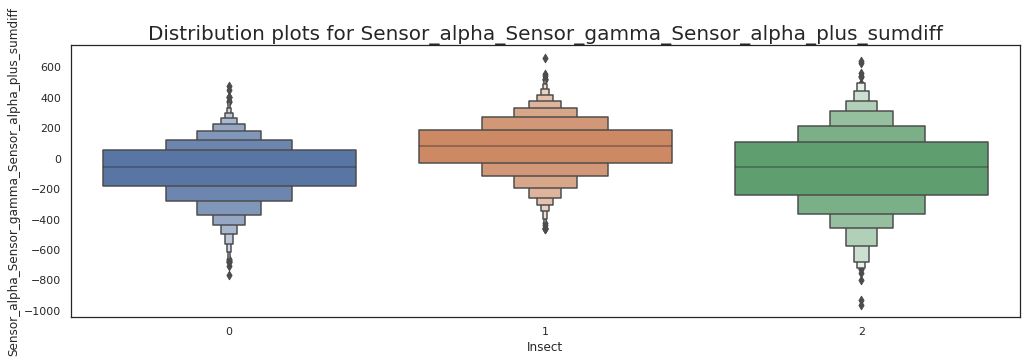

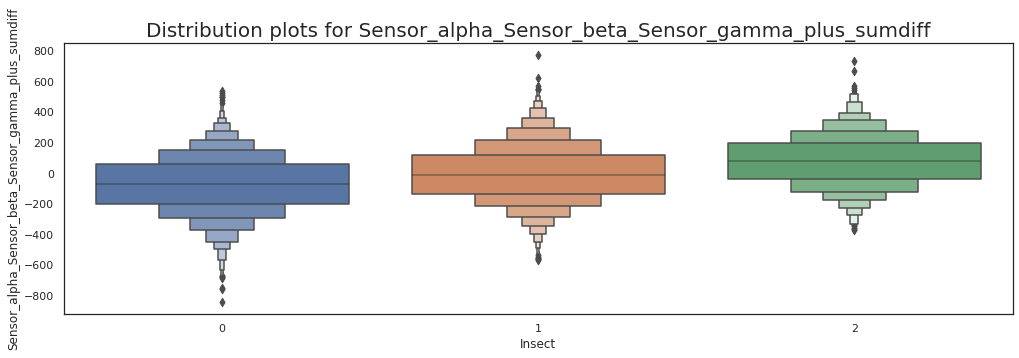

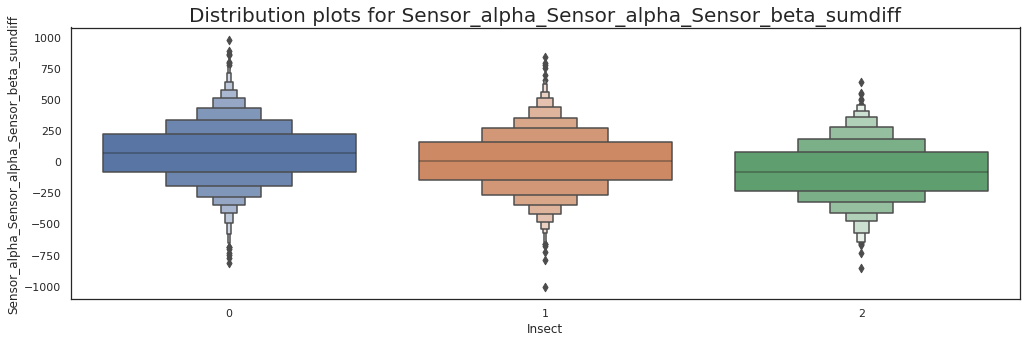

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'sum', 'diff')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_sumdiff)

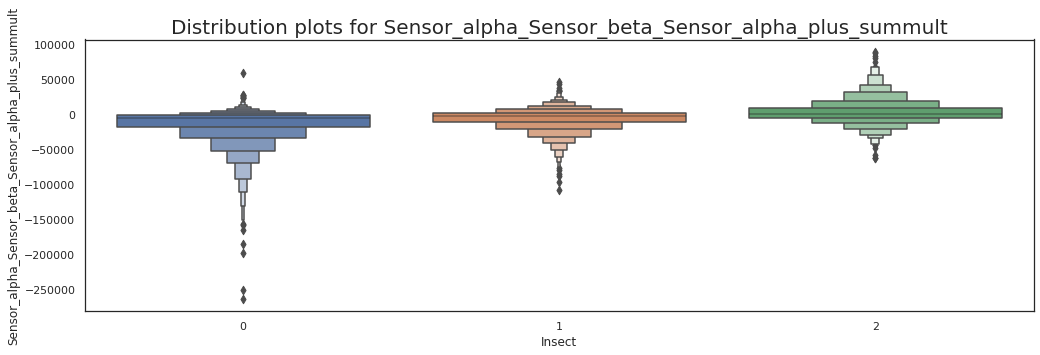

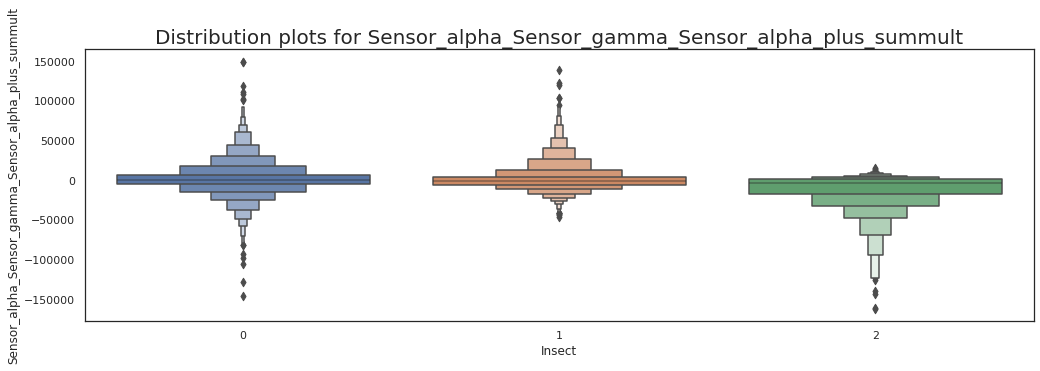

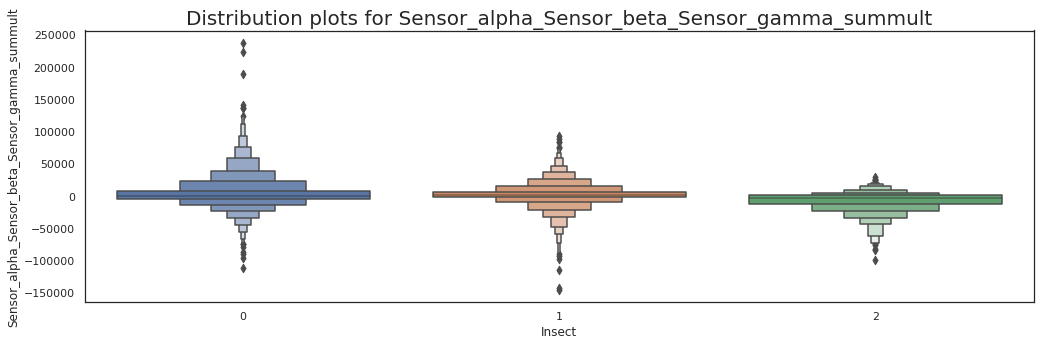

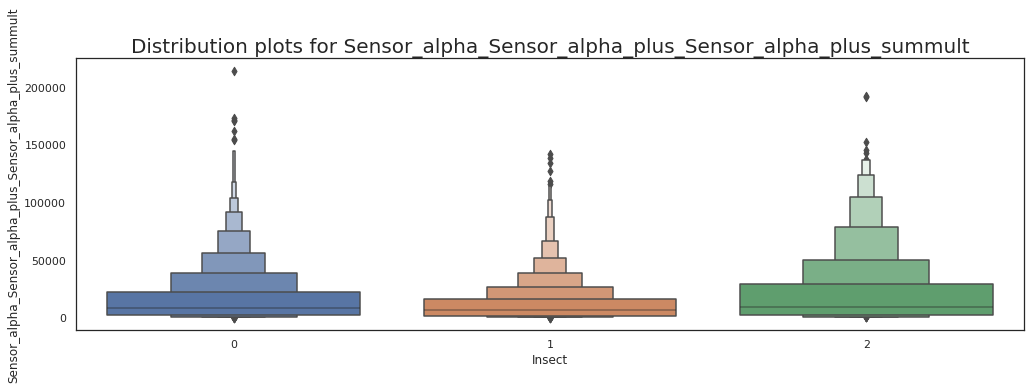

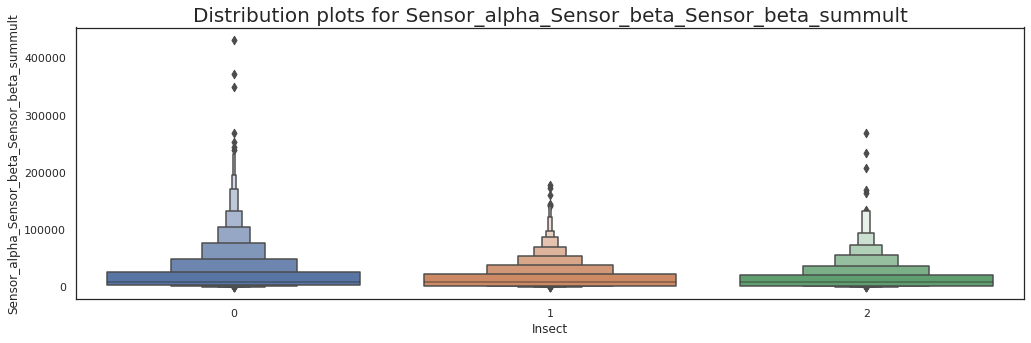

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'sum', 'mult')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_summult)

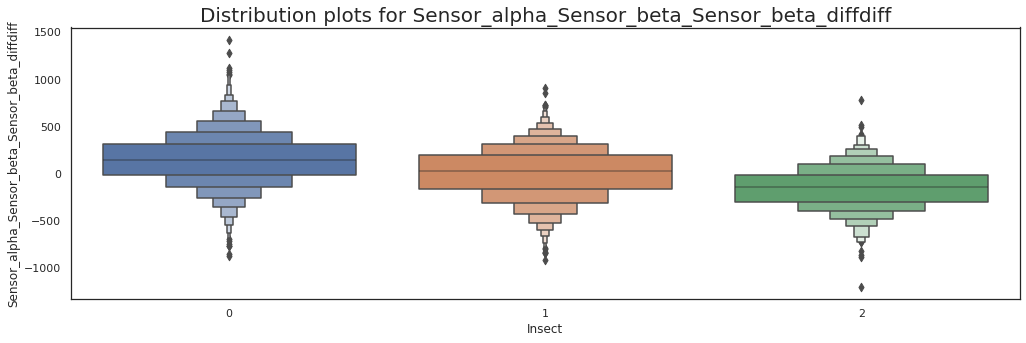

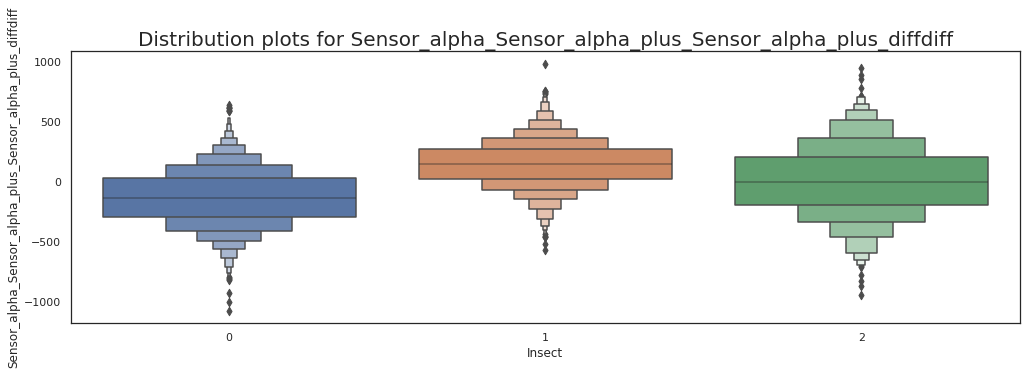

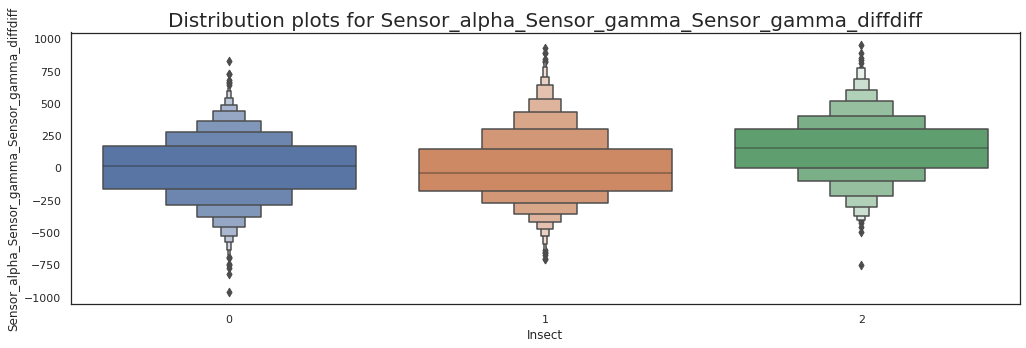

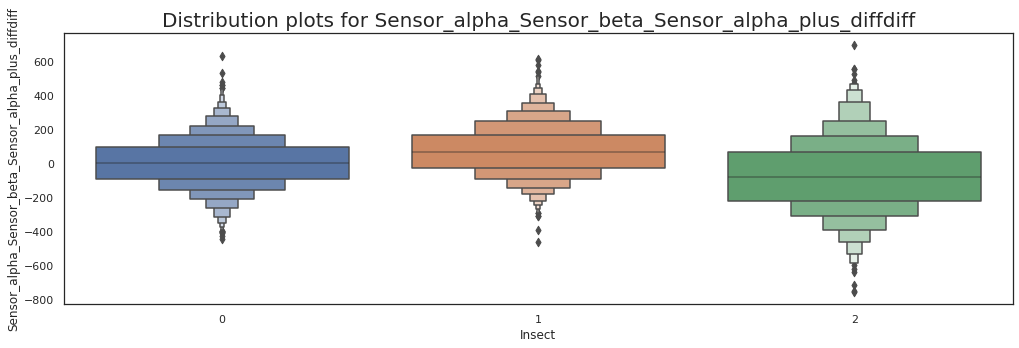

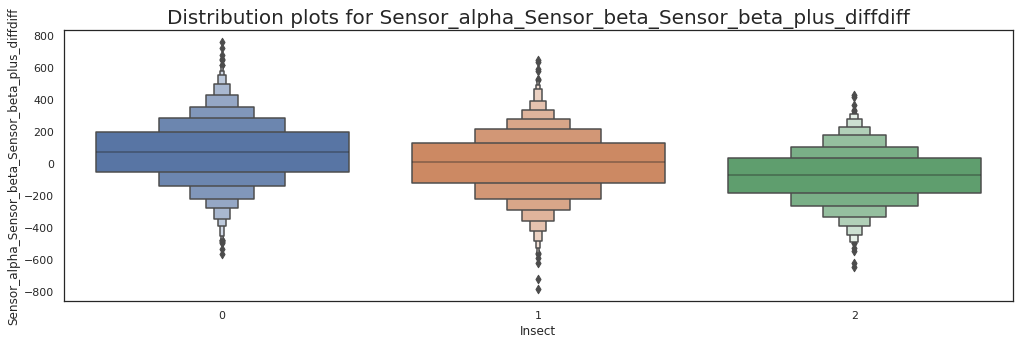

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'diff', 'diff')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_diffdiff)

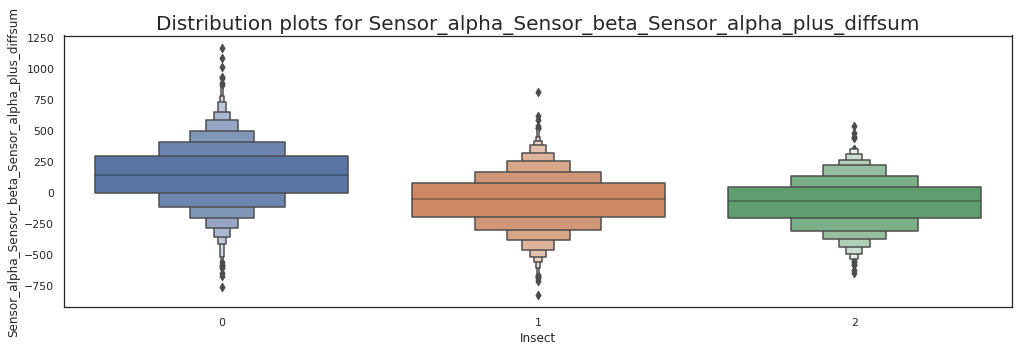

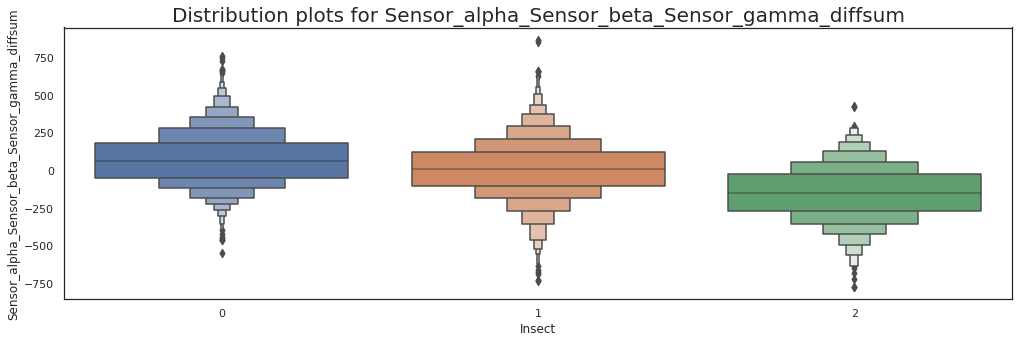

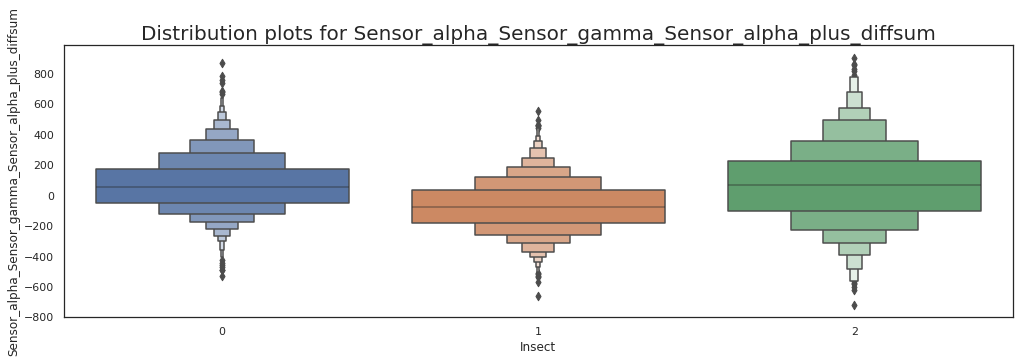

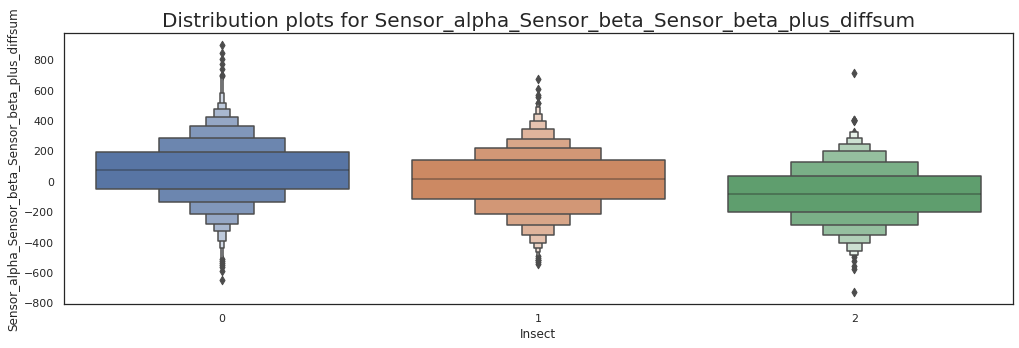

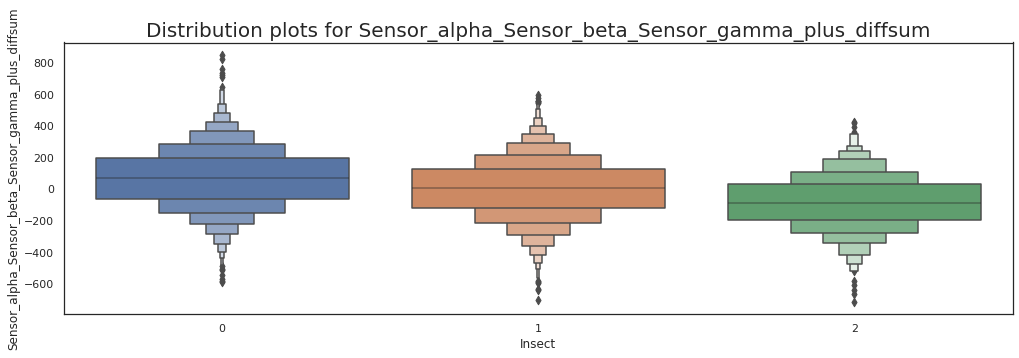

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'diff', 'sum')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_diffsum)

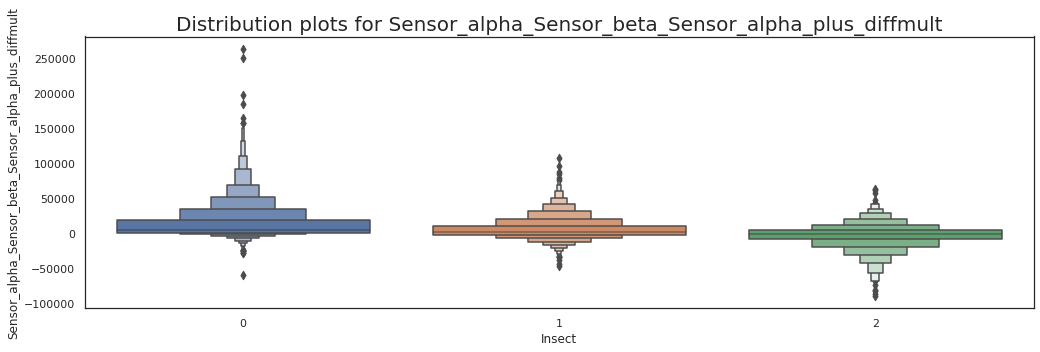

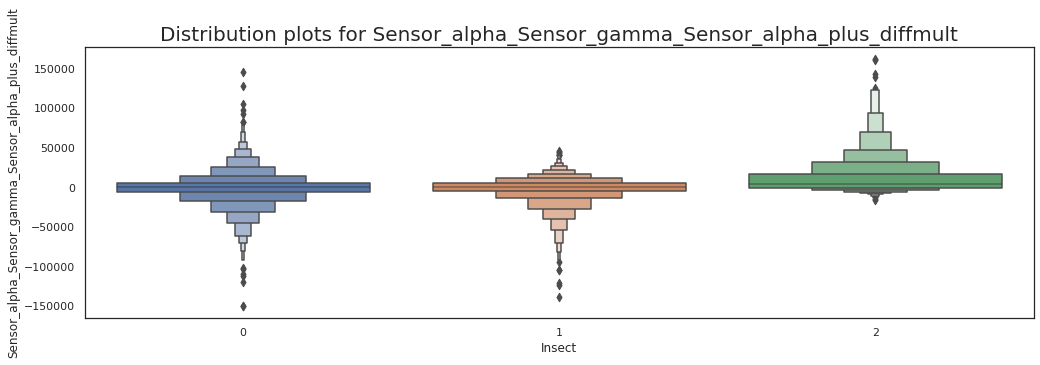

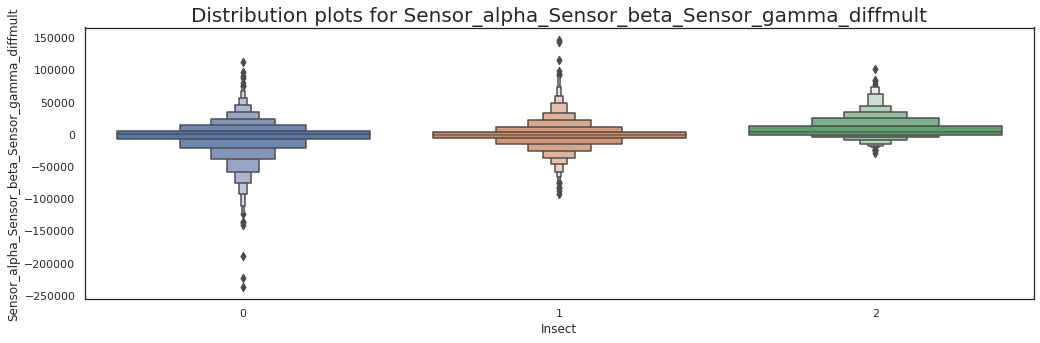

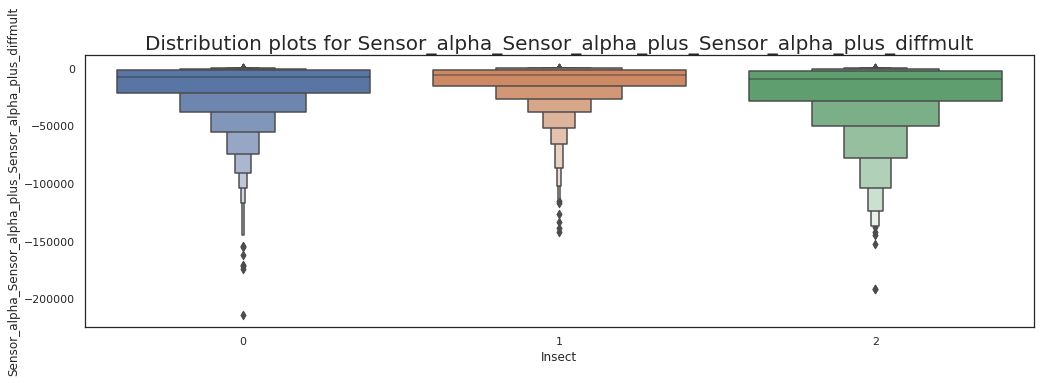

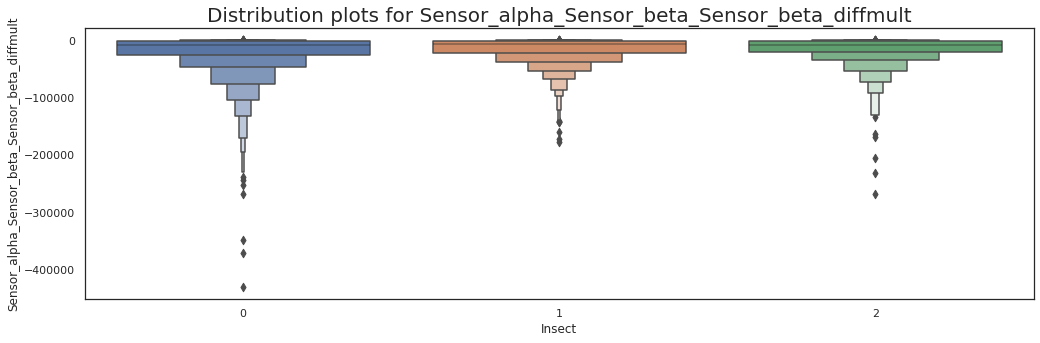

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'diff', 'mult')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_diffmult)

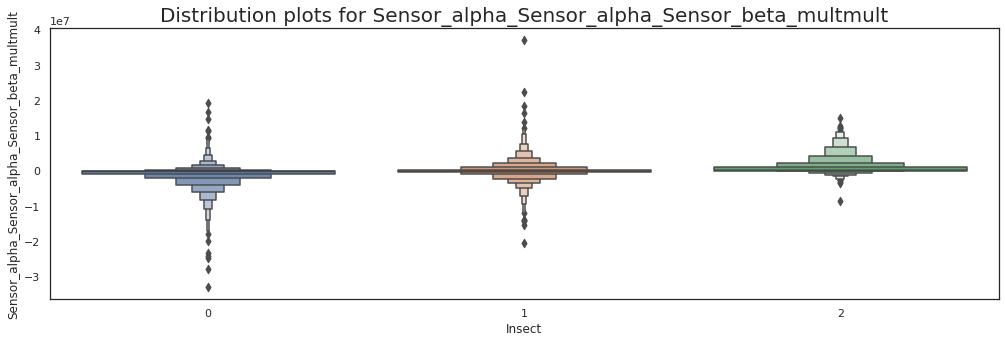

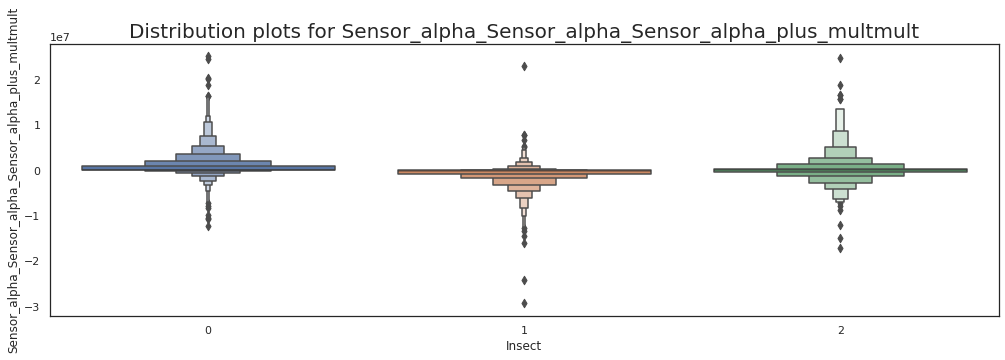

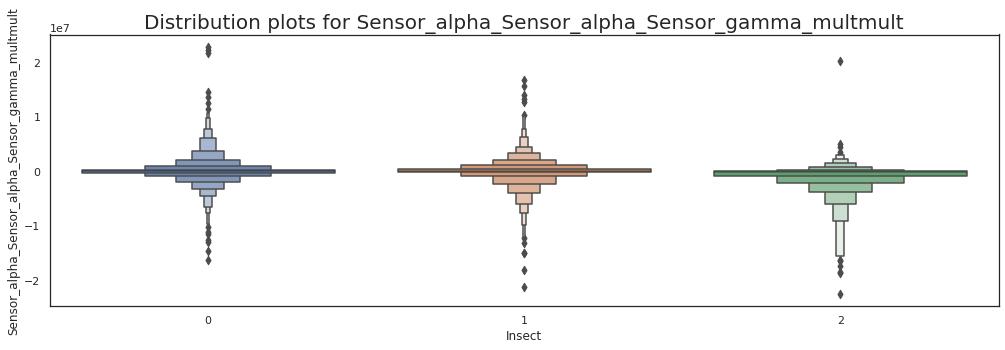

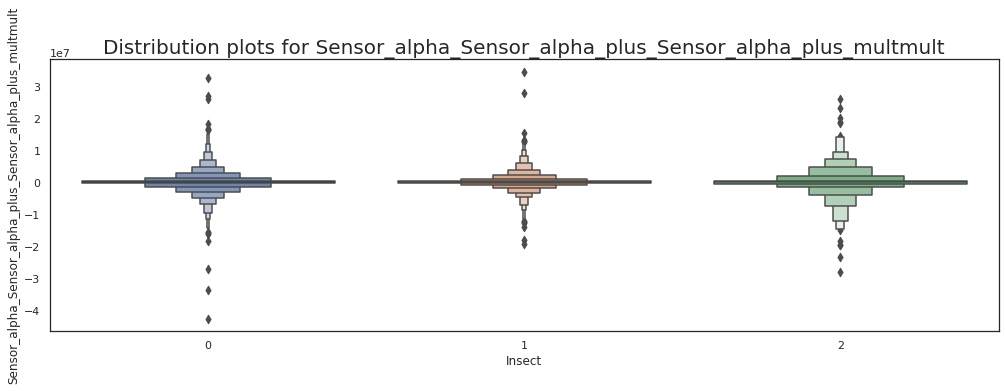

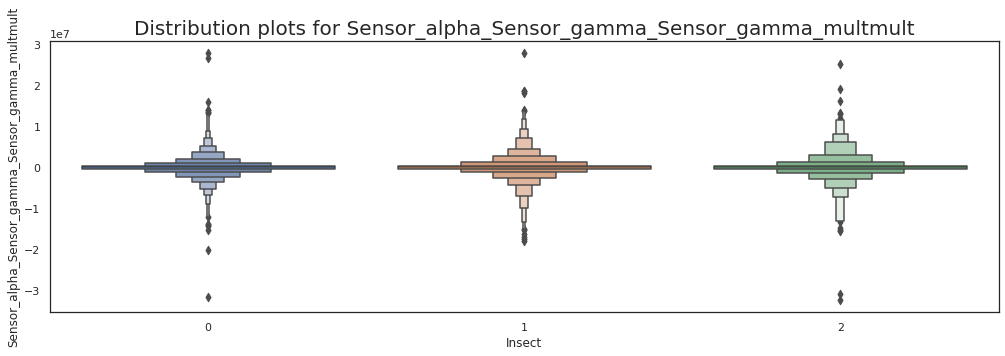

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'mult', 'mult')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_multmult)

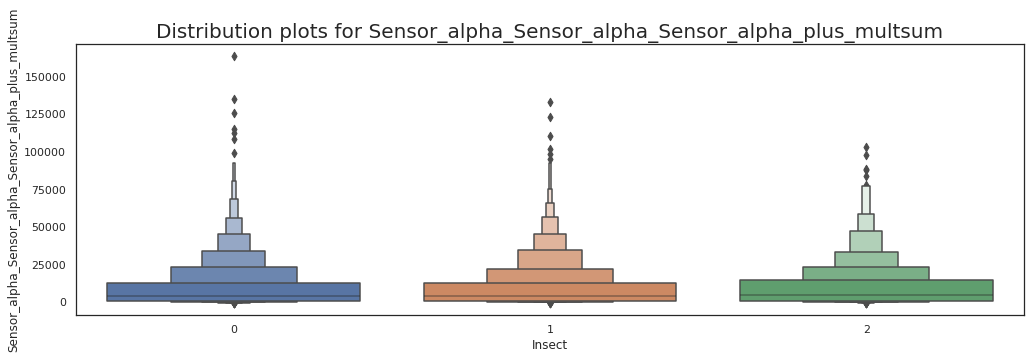

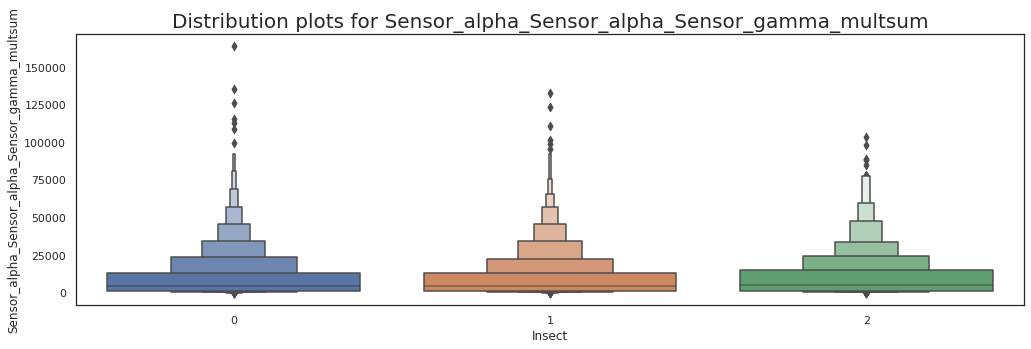

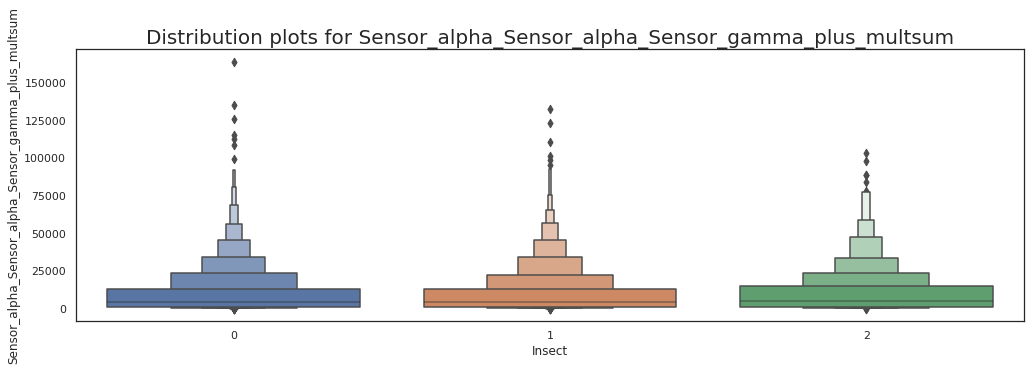

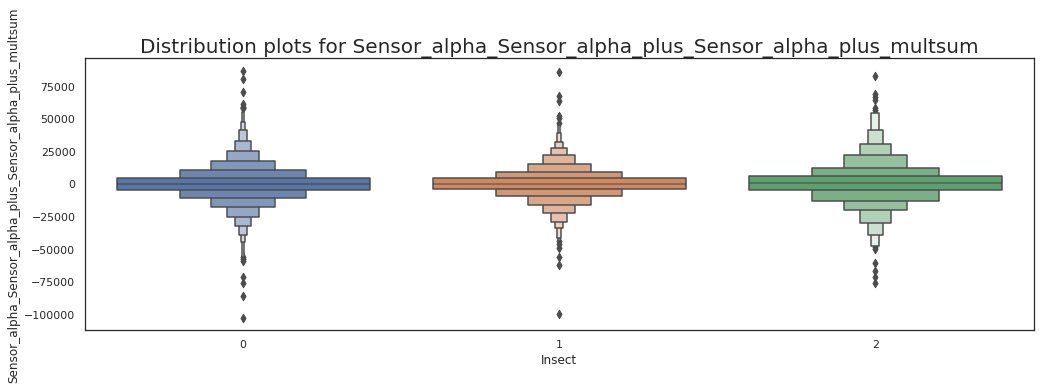

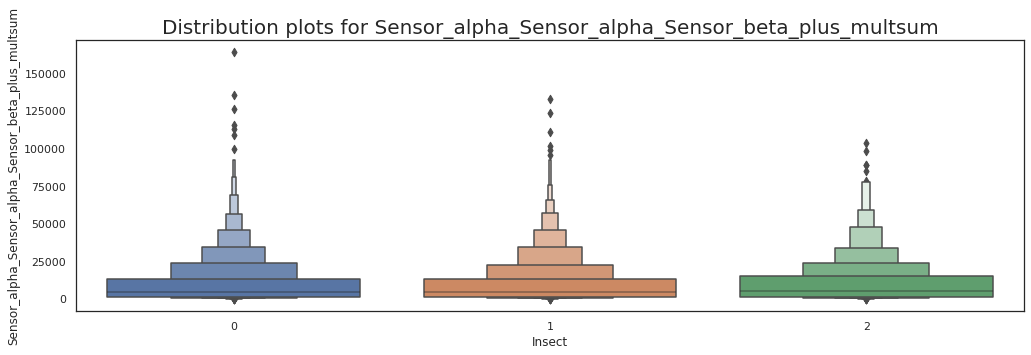

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'mult', 'sum')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_multsum)

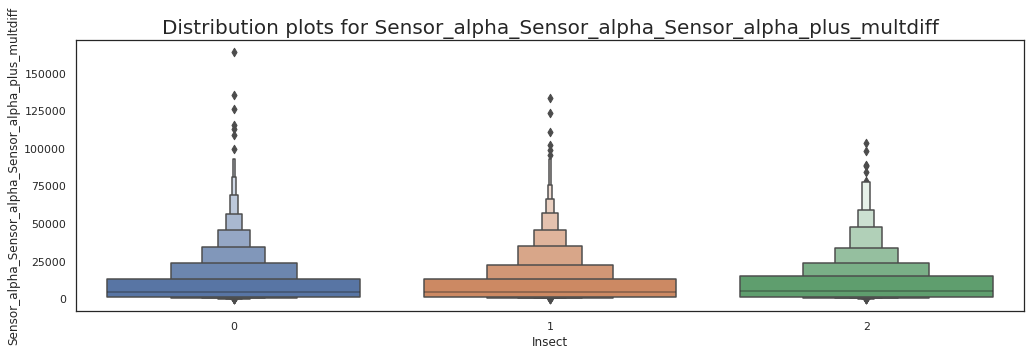

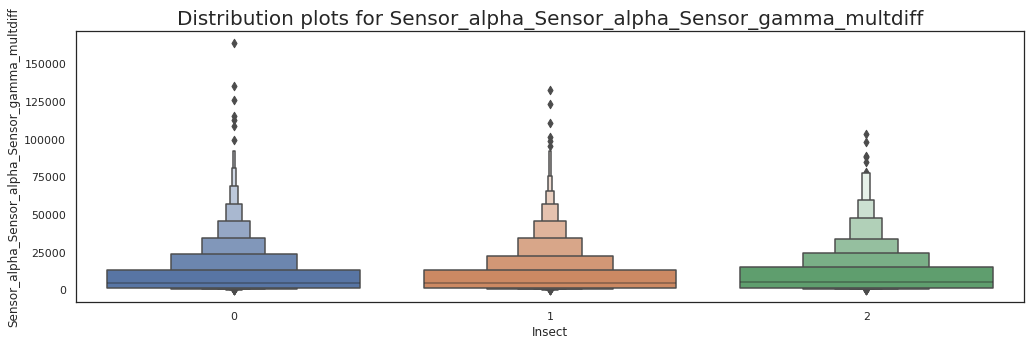

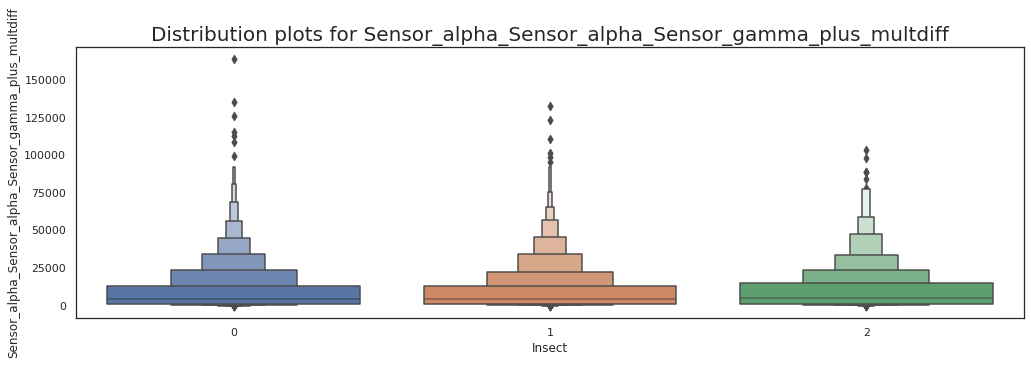

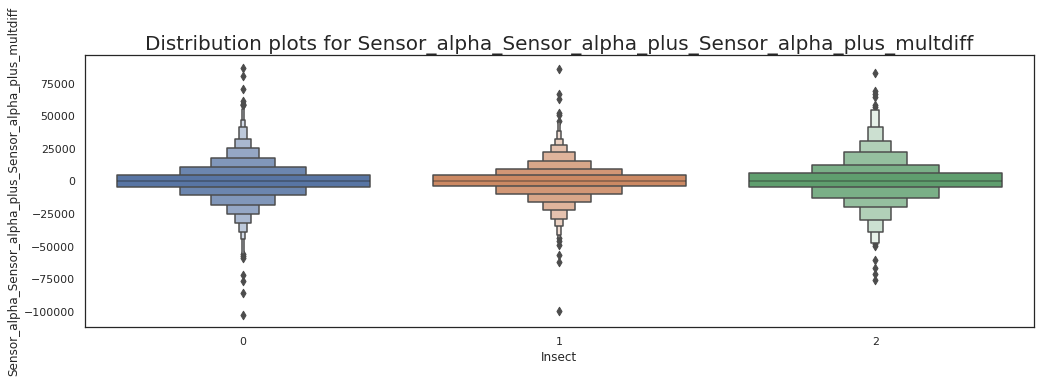

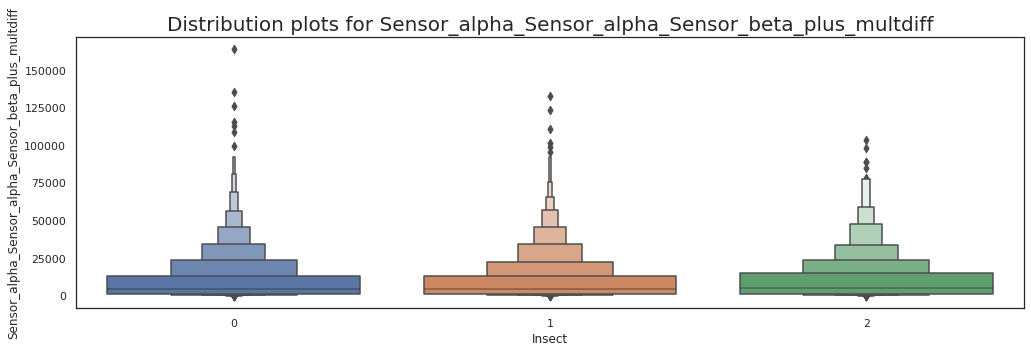

In [ ]:
train_df, diff_among_cats = op_3comp(train_df, vars, 'mult', 'diff')
keep = plot_and_keep(train_df, diff_among_cats, keep, n_multdiff)

# **Conclusiones**

Tras concluir este análisis exploratorio se ha observado lo siguiente:
- Las categorías del target (Insect) podría parecer que están algo desbalanceadas dado que una cateogoría tan sólo tiene el 10% de los registros existentes.
- Las variables de los sensores parecen estar normalmente distribuidas. Esto es un aspecto muy positivo y simplifica bastante futuras implementaciones.
- La combinación de variables añade calidad al problema y permite identificar patrones que a priori no se observaban. Introducir estas variables ayudará bastante al modelo de clasificación.
- La combinación lineal añade muchas variables. Para un dataset de 10.000 registros tener muchas columnas no es nada recomendable. En el siguiente notebook habrá que escoger con qué variables nos quedamos y descartar aquellas que no aportan valor o que simplemente añaden ruido. 

# Similaridad en los datos entre train y test

La siguiente pregunta antes de construir un modelo es comprobar que los datos en train y test son similares. Es decir, que no existe un *data drift*.

Para ello se juntan train y test en un mismo dataframe y se construye un modelo de clasificación binaria que tiene como objetivo averiguar a que dataset corresponde cada registro si a train o test. 

Habrá *data drift* si el modelo es capaz de diferenciar con gran precisión los datos de train de los de tests. Si no es así, el modelo tendrá un score muy bajo y no conseguirá acertar. 

*Data drift* podría ocurrir si por ejemplo los datos de un sensor en train tenían una calibración diferente a los de test, si un sensor se sustituyó por otro... Problemas de este estilo. 

No existe data drift. El modelo peca en predecir la categoría más común (los datos de train, al haber más).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix

In [ ]:
train_df = pd.read_csv(os.path.join('train.csv'), index_col = 0)
test_df = pd.read_csv(os.path.join('test_x.csv'), index_col = 0)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(7001, 9)
(3000, 8)


In [ ]:
del train_df[TARGET]

train_df['is_train'] = 1
test_df['is_train'] = 0

In [ ]:
df_combine = pd.concat([train_df, test_df], axis=0, ignore_index=True)

y = df_combine['is_train'].values #labels
X = df_combine.drop('is_train', axis=1)

In [ ]:
m = RandomForestClassifier(n_jobs=-1, max_depth=10, min_samples_leaf = 5, n_estimators=100)
m.fit(X,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1)

In [ ]:
predictions = m.predict(X)

In [ ]:
print('ROC-AUC for train and test distributions:', roc_auc_score(y, predictions))

ROC-AUC for train and test distributions: 0.5026666666666666


In [ ]:
confusion_matrix(y, predictions)

array([[  16, 2984],
       [   0, 7001]])